### **Importing necessary libraries**

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### **Importing the data**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv("/content/drive/MyDrive/ML_Project/merged_usa_dataset.csv")
df.head()

,Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,United States,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,United States,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,United States,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,United States,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,United States,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      57 non-null     object 
 1   Year                                        57 non-null     int64  
 2   Renewables (% electricity)                  57 non-null     float64
 3   Renewables (% equivalent primary energy)    57 non-null     float64
 4   Biofuels Production - TWh - Total           57 non-null     float64
 5   Solar (% electricity)                       57 non-null     float64
 6   Hydro (% equivalent primary energy)         57 non-null     float64
 7   Electricity from hydro (TWh)                57 non-null     float64
 8   Electricity from wind (TWh)                 57 non-null     float64
 9   Hydro (% electricity)                       57 non-null     float64
 10  Wind (% electric

### **Data Preparation:**

##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [26]:
df_usa = df.drop(['Entity'], axis=1)

In [27]:
df_usa.head()

,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),...,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
0,1965,0.0,4.368870,0.0,0.0,4.074629,397.94818,0.0,0.0,0.0,...,0.0,13.332232,13.332232,0.0,0.0,198.97409,0.0,0.0,0.0,0.0
1,1966,0.0,4.171402,0.0,0.0,3.877466,399.87380,0.0,0.0,0.0,...,0.0,14.062007,14.062007,0.0,0.0,199.93690,0.0,0.0,0.0,0.0
2,1967,0.0,4.542216,0.0,0.0,4.258249,454.44162,0.0,0.0,0.0,...,0.0,14.073571,14.073571,0.0,0.0,227.22081,0.0,0.0,0.0,0.0
3,1968,0.0,4.330974,0.0,0.0,4.035142,456.30942,0.0,0.0,0.0,...,0.0,15.546045,15.546045,0.0,0.0,228.15471,0.0,0.0,0.0,0.0
4,1969,0.0,4.598878,0.0,0.0,4.305610,512.05706,0.0,0.0,0.0,...,0.0,16.227060,16.227060,0.0,0.0,256.02853,0.0,0.0,0.0,0.0


### **Support Vector Machine**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = df_usa

# Split data into training and testing sets, and standardize features
def prepare_data(df, target_variable):
    X = df.drop(columns=[target_variable])
    y = df[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [29]:
def run_svm_models(X_train, X_test, y_train, y_test, kernels, costs):
    results = {}
    for kernel in kernels:
        for cost in costs:
            regressor = SVR(kernel=kernel, C=cost)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[(kernel, cost)] = (mae, mse, r2)

            # Plotting the result for each kernel and cost
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.xlabel("Actual Values (TWh)")
            plt.ylabel("Predicted Values (TWh)")
            plt.title(f"Actual vs Predicted with Kernel: {kernel} and Cost: {cost}")
            plt.show()

    return results

In [30]:
def run_svm_models(X_train, X_test, y_train, y_test, kernels, costs):
    results = {}
    for kernel in kernels:
        for cost in costs:
            regressor = SVR(kernel=kernel, C=cost)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[(kernel, cost)] = (mae, mse, r2)

            # Plotting the result for each kernel and cost
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.xlabel("Actual Values (TWh)")
            plt.ylabel("Predicted Values (TWh)")
            plt.title(f"Actual vs Predicted with Kernel: {kernel} and Cost: {cost}")
            plt.show()

    return results

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = df_usa

In [33]:
# Function to prepare data for modeling
def prepare_data(df, target_variable):
    # We only scale the input features, not the target
    features = df.drop(columns=['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh', target_variable])
    X = df[features.columns]
    y = df[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, features.columns

In [34]:
# Function to run SVM models and collect metrics
def run_svm_models(X_train, X_test, y_train, y_test, kernels, costs):
    results = {}
    for kernel in kernels:
        for cost in costs:
            regressor = SVR(kernel=kernel, C=cost)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[(kernel, cost)] = (mae, mse, r2, y_pred)
    return results

In [39]:
# Function to find the best model, print results, and plot
def find_best_model_and_plot(X_train, X_test, y_train, y_test, results, target):
    best_r2 = -float('inf')
    best_model = None
    best_predictions = None

    for (kernel, cost), (mae, mse, r2, y_pred) in results.items():
        if r2 > best_r2:
            best_r2 = r2
            best_model = SVR(kernel=kernel, C=cost)
            best_predictions = y_pred
            best_model.fit(X_train, y_train)  # Refit the best model with the entire training set

    # Plotting the best model
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, best_predictions, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Values (TWh)")
    plt.ylabel("Predicted Values (TWh)")
    plt.title(f"Best Model for {target} - Kernel: {kernel}, Cost: {cost}\nR-squared: {r2:.2f}")
    plt.show()
    print(f"Best Model for {target}: Kernel: {kernel}, Cost: {cost}, MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

    return best_model, best_r2

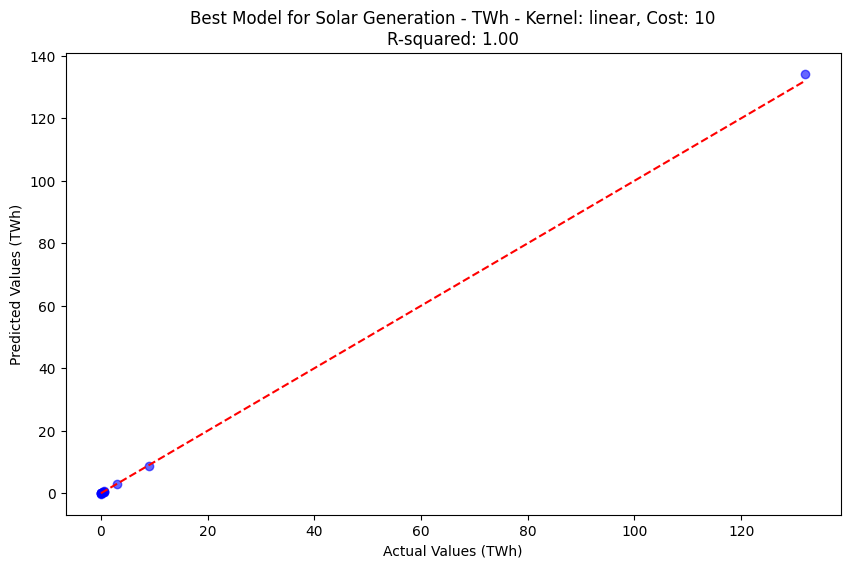

Best Model for Solar Generation - TWh: Kernel: linear, Cost: 10, MAE: 0.27, MSE: 0.43, R-squared: 1.00


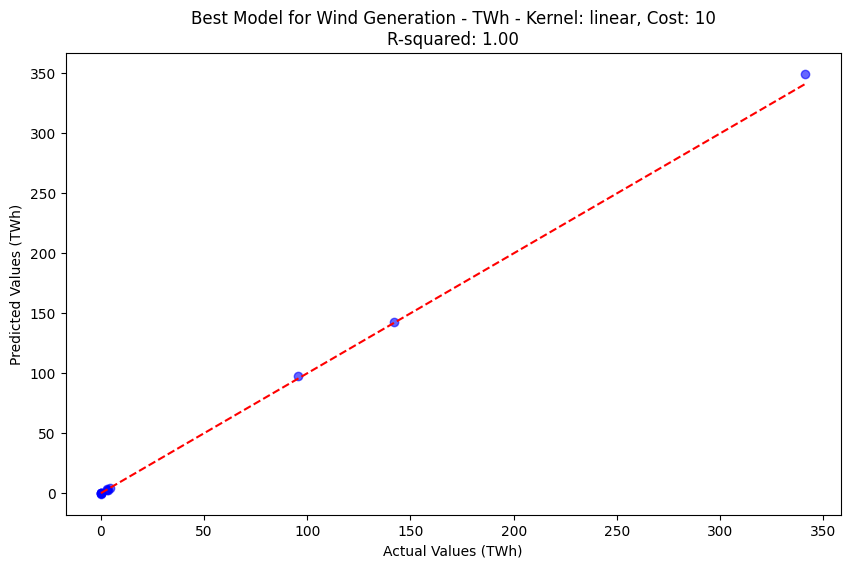

Best Model for Wind Generation - TWh: Kernel: linear, Cost: 10, MAE: 1.08, MSE: 6.39, R-squared: 1.00


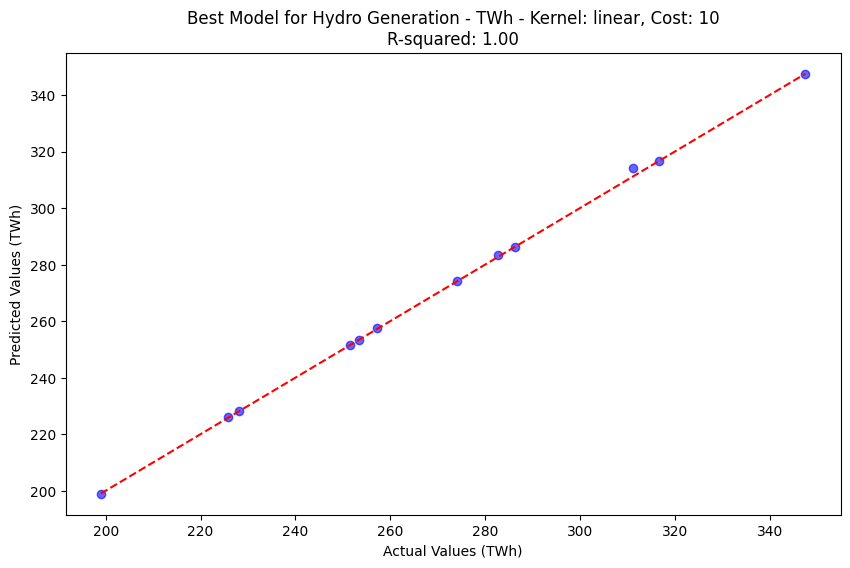

Best Model for Hydro Generation - TWh: Kernel: linear, Cost: 10, MAE: 0.37, MSE: 0.80, R-squared: 1.00


In [40]:
# Define kernels and costs to explore
kernels = ['poly', 'rbf', 'linear']
costs = [0.1, 1, 10]

# Prepare data and find the best models for each target
X_train_solar, X_test_solar, y_train_solar, y_test_solar, scaler_solar, feature_columns = prepare_data(data, 'Solar Generation - TWh')
best_solar_model, _ = find_best_model_and_plot(X_train_solar, X_test_solar, y_train_solar, y_test_solar, run_svm_models(X_train_solar, X_test_solar, y_train_solar, y_test_solar, kernels, costs), 'Solar Generation - TWh')

X_train_wind, X_test_wind, y_train_wind, y_test_wind, scaler_wind, _ = prepare_data(data, 'Wind Generation - TWh')
best_wind_model, _ = find_best_model_and_plot(X_train_wind, X_test_wind, y_train_wind, y_test_wind, run_svm_models(X_train_wind, X_test_wind, y_train_wind, y_test_wind, kernels, costs), 'Wind Generation - TWh')

X_train_hydro, X_test_hydro, y_train_hydro, y_test_hydro, scaler_hydro, _ = prepare_data(data, 'Hydro Generation - TWh')
best_hydro_model, _ = find_best_model_and_plot(X_train_hydro, X_test_hydro, y_train_hydro, y_test_hydro, run_svm_models(X_train_hydro, X_test_hydro, y_train_hydro, y_test_hydro, kernels, costs), 'Hydro Generation - TWh')

In [43]:
# Assume the structure of data and that the feature trends can be linearly extrapolated
future_years = np.arange(2024, 2035)
current_features = data[feature_columns]
future_features = pd.DataFrame(index=future_years)

# Extrapolating each feature
for column in current_features.columns:
    coeffs = np.polyfit(data['Year'], current_features[column], 1)
    future_features[column] = np.poly1d(coeffs)(future_years)

# Standardize the future data using the same scaler as the training data
future_features_scaled_solar = scaler_solar.transform(future_features)
future_features_scaled_wind = scaler_wind.transform(future_features)
future_features_scaled_hydro = scaler_hydro.transform(future_features)

In [45]:
# Predict future values using the best models
future_solar_predictions = best_solar_model.predict(future_features_scaled_solar)
future_wind_predictions = best_wind_model.predict(future_features_scaled_wind)
future_hydro_predictions = best_hydro_model.predict(future_features_scaled_hydro)

# Store predictions in a DataFrame
predictions = pd.DataFrame({
    'Year': future_years,
    'Solar Generation - TWh': future_solar_predictions,
    'Wind Generation - TWh': future_wind_predictions,
    'Hydro Generation - TWh': future_hydro_predictions
})
predictions

,Year,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,2024,50.796969,189.245681,282.898396
1,2025,52.011584,193.653532,283.155718
2,2026,53.226200,198.061383,283.413039
3,2027,54.440816,202.469234,283.670361
4,2028,55.655432,206.877085,283.927682
5,2029,56.870047,211.284936,284.185004
6,2030,58.084663,215.692787,284.442325
7,2031,59.299279,220.100638,284.699647
8,2032,60.513895,224.508489,284.956968
9,2033,61.728510,228.916340,285.214290
